## Подготовка данных
- импорт необходимых библиотек
- визуализация данных
- проверка на дубли и пропуски
- приведение данных в необходимый тип

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
columns = data.columns
columns_new = []
for name in columns:
  columns_new.append(re.sub(r'(?<!^)(?=[A-Z])', '_', name).lower())
data.set_axis(columns_new, axis='columns', inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            9091 non-null   float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data.isnull().sum(axis = 0)

row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

In [6]:
data.tenure.value_counts

<bound method IndexOpsMixin.value_counts of 0        2.0
1        1.0
2        8.0
3        1.0
4        2.0
        ... 
9995     5.0
9996    10.0
9997     7.0
9998     3.0
9999     NaN
Name: tenure, Length: 10000, dtype: float64>

In [7]:
bool_series = pd.isnull(data['tenure']) 
data[bool_series]

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [8]:
data = data.dropna(subset=['tenure']).reset_index(drop=True)

In [9]:
data['customer_id'].duplicated().sum()

0

In [10]:
df = data.drop(['row_number','customer_id','surname'], axis=1)

In [11]:
df['geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [13]:
df['tenure'] = df['tenure'].astype(int)
df['balance'] = df['balance'].astype(int)
df['estimated_salary'] = df['estimated_salary'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   credit_score      9091 non-null   int64 
 1   geography         9091 non-null   object
 2   gender            9091 non-null   object
 3   age               9091 non-null   int64 
 4   tenure            9091 non-null   int64 
 5   balance           9091 non-null   int64 
 6   num_of_products   9091 non-null   int64 
 7   has_cr_card       9091 non-null   int64 
 8   is_active_member  9091 non-null   int64 
 9   estimated_salary  9091 non-null   int64 
 10  exited            9091 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 781.4+ KB


**Вывод:** В исследуемом датасете изначально было 1000 строк с типами данных float, int, object. Переименованы название столбцов в более читаемый формат. Пропуски обнаружены по столбцу "Tenure" (сколько лет человек является клиентом банка) в количестве 909 строк (9,1%). Строки с пропусками были удалены. Также удалены столбцы "row_number", "customer_id", "'surname", т.к. эти данные не информативные для дальнейшего исследования. Явных дубликатов не обнаружено. Столбцы "tenure", "balance", "estimated_salary" переведены в количественный тип.

## Исследование задачи
- проверка зависимости данных друг от друга
- обход дамми-ловушки
- деление датасета на выборки
- выделение x и y для выборок

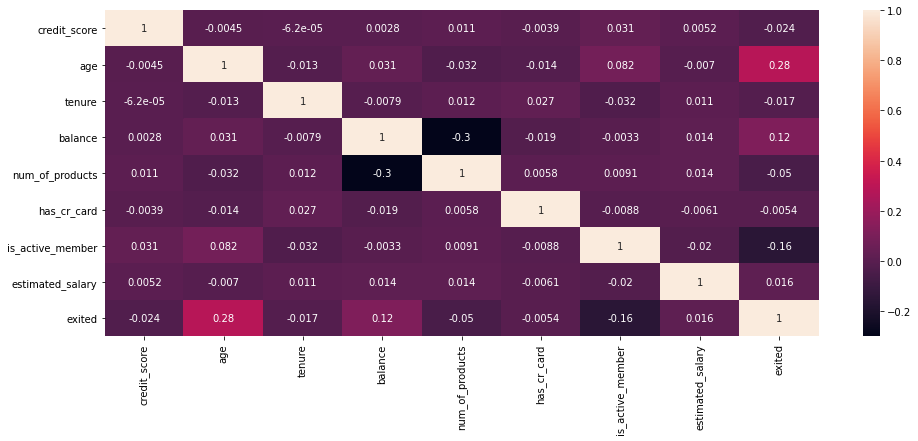

In [15]:
#Построение корреляционной матрицы
plt.figure(figsize = (16,6))
corr_matrix = sns.heatmap(df[['credit_score','age','tenure','balance','num_of_products','has_cr_card','is_active_member','estimated_salary',
                            'exited']].corr(), annot=True)
plt.show()

In [16]:
df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9086,800,29,2,0,2,0,0,167773,0,0,0,0
9087,771,39,5,0,2,1,0,96270,0,0,0,1
9088,516,35,10,57369,1,1,1,101699,0,0,0,1
9089,709,36,7,0,1,0,1,42085,1,0,0,0


In [17]:
df_train, df_test = train_test_split(df_ohe, test_size=0.25, random_state=12345)
df_train, df_valid = train_test_split(df_train, test_size=0.333, random_state=12345)

In [18]:
features_train = df_train.drop(['exited'], axis=1)
target_train = df_train['exited']

features_test = df_test.drop(['exited'], axis=1)
target_test = df_test['exited']

features_valid = df_valid.drop(['exited'], axis=1)
target_valid = df_valid['exited']

print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)
print(features_valid.shape)
print(target_valid.shape)

(4547, 11)
(4547,)
(2273, 11)
(2273,)
(2271, 11)
(2271,)


**Вывод:** 
1. Явно выраженных линейных зависимостей между числовыми параметрами нет. Есть невысокая 0,28 между возрастом и фактов ухода из банка. также есть отрицательные зависимости между балансом на счету и количеством продуктов в банке -0,3;
2. Выделены новые столбцы "geography_Germany", "geography_Spain" и "gender_Male", обойдя дамми-ловушку;
3. Выделены выборки обучающая, валидационная и тестировочная, в процентном соотношении 50/25/25.

## Борьба с дисбалансом
- масштабирование данных
- проверка данных на одной модели без подбора гиперпараметров, при дисбалансе
- подсчёт классов в целевом признаке
- проверим данных на трех моделях: логистической регрессии, решающего леса и случайного леса, при дисбалансе и балансе данных.</font><br>
Дисбаланс моделей будем убирать с помощью методов: взвешивания классов, увеличения и уменьшения выборок.

In [19]:
#Масштабирование признаков
numeric = ['credit_score','age','balance','estimated_salary']

pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [20]:
model_logistic_regression_imbalance = LogisticRegression(random_state=12345, solver='liblinear') 
model_logistic_regression_imbalance.fit(features_train,target_train) 
predictions_logistic_regression_imbalance = model_logistic_regression_imbalance.predict(features_valid)

print("F1:", f1_score(target_valid, predictions_logistic_regression_imbalance))

F1: 0.2698412698412698


ROC-AUC: 0.7607674769716992


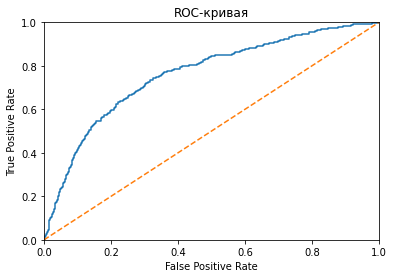

In [21]:
def plt_roc_curve(model, features, target):
    """Построение ROC-кривой и расчет метрики AUC-ROC"""
    probabilities_one_test = model.predict_proba(features)[:, 1]
    print("ROC-AUC:", roc_auc_score(target, probabilities_one_test))
    fpr, tpr, thresholds = roc_curve(target, probabilities_one_test)

    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()
plt_roc_curve(model_logistic_regression_imbalance, features_valid, target_valid)    

0    0.796062
1    0.203938
Name: exited, dtype: float64


<AxesSubplot:>

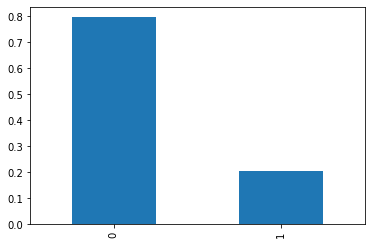

In [22]:
#Подсчёт классов в целевом признаке 
class_frequency = df_ohe['exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

**Вывод:** 
1. Промасштабировали данных по столбцам "credit_score","age","balance","estimated_salary" во всех Х-ых выборках.
2. Проверка несбалансированных данных на модели Логистической регрессии без гиперпараметров показала метрику F1: 0.27, а AUC-ROC: 0.57.
3. Из подсчета классов целевого признака видно, что 1 в 4 раза меньше чем 0. Данных имеют достаточно сильных дисбаланс.

### Модель: логистической регрессии

In [23]:
%%time
# Подбор гиперпараметров
parametrs = {'solver': ['newton-cg','lbfgs','liblinear', 'sag', 'saga'],
            'max_iter':range(5, 10, 1)}
model_logistic_regression = LogisticRegression(random_state=12345)
grid_model = GridSearchCV(model_logistic_regression, parametrs, scoring ='f1' )
grid_model.fit(features_train,target_train)
predictions_logistic_regression = grid_model.predict(features_valid)
print(grid_model.best_params_)
print("F1:",grid_model.best_score_)
print("AUC-ROC:", roc_auc_score(target_valid,predictions_logistic_regression))

/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the

{'max_iter': 6, 'solver': 'sag'}
F1: 0.35068562932443303
AUC-ROC: 0.5501098877876629
CPU times: user 9.94 s, sys: 12.9 s, total: 22.8 s
Wall time: 23 s


In [24]:
best_model_logistic_regression = grid_model.best_estimator_

In [25]:
#Взвешивание классов
best_model_logistic_regression_weighted = LogisticRegression(random_state=12345, solver='sag', max_iter=6,
                                               class_weight='balanced') 
best_model_logistic_regression_weighted.fit(features_train,target_train) 
predictions_logistic_regression_weighted = best_model_logistic_regression_weighted.predict(features_valid)

print("F1:", f1_score(target_valid, predictions_logistic_regression_weighted))

F1: 0.5024356297842729


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [26]:
#Увеличение выборки
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

best_model_logistic_regression.fit(features_upsampled, target_upsampled)
predictions_logistic_regression_upsample = best_model_logistic_regression.predict(features_valid)


print("F1:", f1_score(target_valid, predictions_logistic_regression_upsample))

F1: 0.5077720207253886


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


<AxesSubplot:>

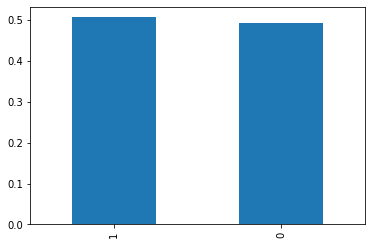

In [27]:
class_target_upsampled = target_upsampled.value_counts(normalize=True)
class_target_upsampled.plot(kind='bar')

In [28]:
#Уменьшение выборки
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

best_model_logistic_regression.fit(features_downsampled, target_downsampled)
predictions_logistic_regression_downsample = best_model_logistic_regression.predict(features_valid)

print("F1:", f1_score(target_valid, predictions_logistic_regression_downsample))

F1: 0.5125268432355046


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


<AxesSubplot:>

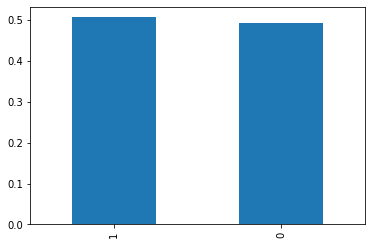

In [29]:
class_target_downsampled = target_downsampled.value_counts(normalize=True)
class_target_downsampled.plot(kind='bar')

ROC-AUC: 0.7588080462280078


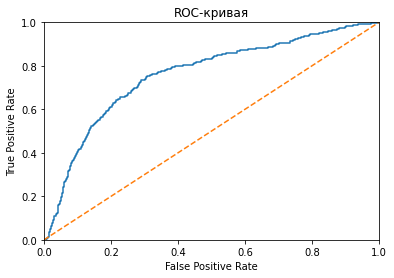

In [30]:
plt_roc_curve(best_model_logistic_regression, features_valid, target_valid) 

**Вывод:** При подборе гиперпараметров в Логистической регрессии лучшими параметрами оказались "max_iter"- 6, "solver" - 'sag' и значением F1-меры 0.35 на несбалансированных данных.</font><br>
Наилучшим показателем F1-меры 0.513 оказалось при уменьшении выборки.

### Решающее дерево

In [31]:
%%time
# Подбор гиперпараметров
parametrs = {'criterion': ['entropy', 'gini'],
            'max_depth':range(1, 10, 2)}
model_decision_tree = DecisionTreeClassifier(random_state=12345)
grid_model = GridSearchCV(model_decision_tree, parametrs, scoring ='f1' )
grid_model.fit(features_train,target_train)
predictions_decision_tree = grid_model.predict(features_valid)
print(grid_model.best_params_)
print("F1:",grid_model.best_score_)

{'criterion': 'gini', 'max_depth': 7}
F1: 0.5419242411415268
CPU times: user 710 ms, sys: 0 ns, total: 710 ms
Wall time: 816 ms


In [32]:
best_model_decision_tree = grid_model.best_estimator_

In [33]:
#Взвешивание классов
model_decision_tree_weighted = DecisionTreeClassifier(random_state=12345, criterion ='gini', max_depth=6,class_weight='balanced')
model_decision_tree_weighted.fit(features_train,target_train) 
predictions_decision_tree_weighted = model_decision_tree_weighted.predict(features_valid)
print("F1:", f1_score(target_valid, predictions_decision_tree_weighted))

F1: 0.566358024691358


In [34]:
#Увеличение выборки
best_model_decision_tree.fit(features_upsampled, target_upsampled)
predictions_decision_tree_upsample = best_model_decision_tree.predict(features_valid)

print("F1:", f1_score(target_valid, predictions_decision_tree_upsample))

F1: 0.579454253611557


In [35]:
#Уменьшение выборки
best_model_decision_tree.fit(features_downsampled, target_downsampled)
predictions_decision_tree_downsample = best_model_decision_tree.predict(features_valid)

print("F1:", f1_score(target_valid, predictions_decision_tree_downsample))

F1: 0.5621716287215412


ROC-AUC: 0.8038737793180852


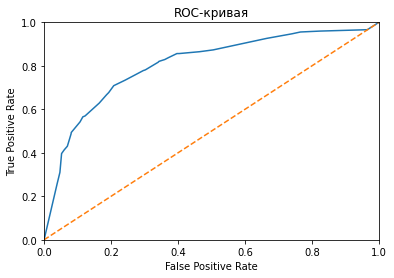

In [36]:
plt_roc_curve(best_model_decision_tree, features_valid, target_valid) 

**Вывод:** При подборе гиперпараметров в Решающем дереве лучшими параметрами оказались "criterion"- 'gini', "max_depth"- 7 и значением F1-меры 0.542 на несбалансированных данных.</font><br>
Наилучшим показателем F1-меры 0.579 оказалось при увеличении выборки.

### Случайный лес

In [37]:
#%%time
# Подбор гиперпараметров

#parametrs = {'n_estimators': range(1, 10, 1),'max_depth':range(10, 15, 1)}
#model_random_fores = RandomForestClassifier(random_state=12345)
#grid_model = GridSearchCV(model_random_fores, parametrs, scoring ='f1' )
#grid_model.fit(features_train,target_train)
#predictions_random_forest = grid_model.predict(features_valid)
#print(grid_model.best_params_)
#print("F1:",grid_model.best_score_)
#{'max_depth': 12, 'n_estimators': 7}
#F1: 0.5553318307527724
#CPU times: user 9.24 s, sys: 0 ns, total: 9.24 s
#Wall time: 9.24 s

In [38]:
best_model_random_forest = None
best_result_random_forest = 0
for est in range(1, 60, 10):
    for depth in range(1, 15, 2):
        model_random_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_random_forest.fit(features_train,target_train ) 
        result = model_random_forest.score(features_valid, target_valid)
        if result > best_result_random_forest:
            best_model_random_forest = model_random_forest
            best_result_random_forest =result 

print("Accuracy наилучшей модели случайный лес на валидационной выборке:", best_result_random_forest)
print("Лучшее гиперпараметры модели случайный лес на валидационной выборки:", best_model_random_forest)

Accuracy наилучшей модели случайный лес на валидационной выборке: 0.8630559225011009
Лучшее гиперпараметры модели случайный лес на валидационной выборки: RandomForestClassifier(max_depth=11, n_estimators=51, random_state=12345)


In [39]:
model_random_forest = RandomForestClassifier(random_state=12345, n_estimators=51, max_depth=11)
model_random_forest.fit(features_train,target_train) 
predictions_random_forest = model_random_forest.predict(features_valid)

print("F1:", f1_score(target_valid, predictions_random_forest))

F1: 0.5601131541725601


In [40]:
#Взвешивание классов
model_random_forest_weighted = RandomForestClassifier(random_state=12345, n_estimators=51, max_depth=11, 
                                             class_weight='balanced')
model_random_forest_weighted.fit(features_train,target_train) 
predictions_random_forest_weighted = model_random_forest_weighted.predict(features_valid)
f1_random_forest = f1_score(target_valid, predictions_random_forest_weighted)
roc_au_random_forest = roc_auc_score(target_valid, predictions_random_forest_weighted) 

print("F1:", f1_random_forest)

F1: 0.5992779783393503


In [41]:
#Увеличение выборки
model_random_forest.fit(features_upsampled, target_upsampled)
predictions_random_forest_upsample = model_random_forest.predict(features_valid)

print("F1:", f1_score(target_valid, predictions_random_forest_upsample))

F1: 0.6275720164609053


In [42]:
#Уменьшение выборки
model_random_forest.fit(features_downsampled, target_downsampled)
predictions_random_forest_downsample = model_random_forest.predict(features_valid)

print("F1:", f1_score(target_valid, predictions_random_forest_downsample))

F1: 0.5844155844155844


ROC-AUC: 0.844761780651766


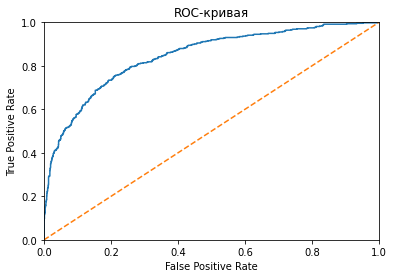

In [43]:
plt_roc_curve(model_random_forest, features_valid, target_valid) 

**Вывод:** При подборе гиперпараметров в Случайны лес лучшими параметрами оказались "n_estimators" - 51, "max_depth" - 11 и значением F1-меры 0.56 на несбалансированных данных, полученные путем циклов. При кросc-валидации F1-меры получилась меньше 0.555</font><br>
Наилучшим показателем F1-меры 0.628 оказалось при увеличении выборки, в ROC-AUC 0.845. Цель достигнута

## Проверка модели на тестовой выборке
- проверка тестовой выборке на тестовых данных на модели Случайного леса при увеличенной выбрке
- исследование метрики AUC-ROC
- проверить модель на адекватность

In [44]:
model_random_forest.fit(features_upsampled, target_upsampled)
predictions_random_forest_upsample = model_random_forest.predict(features_test)

print("F1:", f1_score(target_test, predictions_random_forest_upsample))
print("Accuracy:", accuracy_score(target_test, predictions_random_forest_upsample))

F1: 0.6064382139148494
Accuracy: 0.8332600087989441


AUC-ROC: 0.8610101713231482


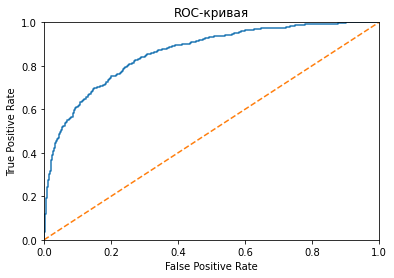

In [45]:
# ROC-кривая на тестовых данных выбранной модели
probabilities_test = model_random_forest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
print("AUC-ROC:", roc_auc_score(target_test, probabilities_one_test))
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [46]:
#dummy_clf = DummyClassifier(strategy='most_frequent', random_state=12345)
#dummy_clf.fit(features_train, target_train)

#dummy_clf.score(features_test, target_test)

In [47]:
target = df_ohe['exited']
features = df_ohe.drop('exited', axis=1)

target_pred_constant = pd.Series([0]*len(target) )

print(accuracy_score(target, target_pred_constant))

0.7960620393796062


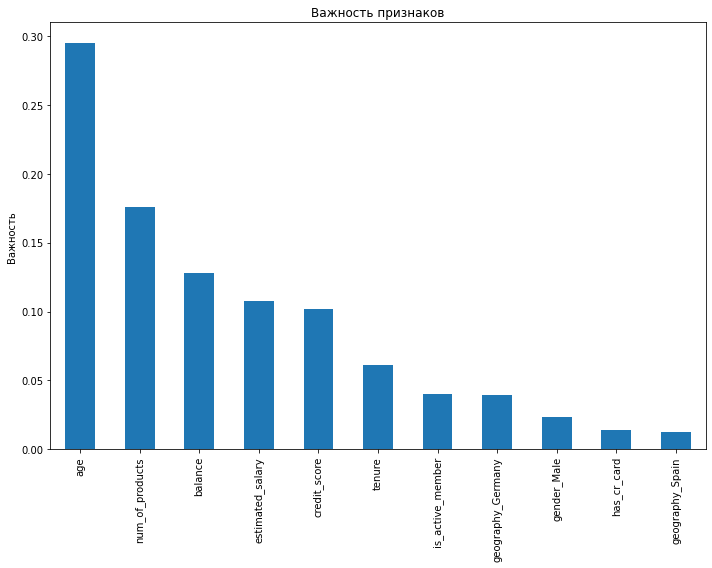

In [48]:
forest_importances = pd.Series(model_random_forest.feature_importances_,
                         df_ohe.drop(['exited'], axis=1).columns).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,8))
forest_importances.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

## Общий вывод
При исследовании данных были проведены следующие действия:
1. Подготовка данных.
- обнаружены и удалены пропуски по столбцу "Tenure", т.к. составляли менее 10% от самого столбца;
- удалены столбцы "row_number", "customer_id", "surname", потому что неинформативны для анализа; 
- переведены три столбца из flot в int, при чем без этого действия итоговая F1-мера на тестовых данных была меньше 0,609.
2. Исследование задачи
- сильных линейных зависимостей не обнаружено, можно выделить незначительную 0,28 между возрастом и фактов ухода из банка, и  отрицательную между балансом на счету и количеством продуктов в банке -0,3;
- данные разделены выборки обучающая, валидационная и тестировочная, в процентном соотношении 50/25/25 соответственно.
3. Борьба с дисбалансом
- в данных по целевому признаку есть сильный дисбаланс классов, количество фактов ухода превышает в 4 раза, чем оставшихся в банке;
- масштабировали данные по столбцам "credit_score","age","balance","estimated_salary";
- проверка несбалансированных данных на модели Логистической регрессии без гиперпараметров показала метрику F1: 0.27, а AUC-ROC: 0.57, что не является не высокой опираться на такие данных не следует;
- данных были проверен на трех моделях логистической регрессии, решающего леса и случайного леса, лучшей из которой с показателем F1-меры 0.628 оказалось при увеличении выборки случайного леса. 
4. Проверка модели
- на тестовой выборке выбранная модель показала F1 0.606, Accuracy 0.833, AUC-ROC 0.86, что является хорошими показателями и удовлетворяет цели нашей задачи;
- при проверке выбранной модели на адекватность сравним ее с константной моделью, где Accuracy составила 0.796, что подтверждает правильность использования выбранной модели "Случайный лес";
- важными факторами, влияющие на нашу метрику, является возвраст и количество продуктов в банке.